In [1]:
#  Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from sklearn import metrics
import tensorflow as tf
from tensorflow.contrib import learn

In [3]:
### Download and load MNIST data.

mnist = learn.datasets.load_dataset('mnist')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
### Convolutional network


def max_pool_2x2(tensor_in):
  return tf.nn.max_pool(
      tensor_in, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


def conv_model(X, y):
  # pylint: disable=invalid-name,missing-docstring
  # reshape X to 4d tensor with 2nd and 3rd dimensions being image width and
  # height final dimension being the number of color channels.
  X = tf.reshape(X, [-1, 28, 28, 1])
  # first conv layer will compute 32 features for each 5x5 patch
  with tf.variable_scope('conv_layer1'):
    h_conv1 = learn.ops.conv2d(X, n_filters=32, filter_shape=[5, 5],
                               bias=True, activation=tf.nn.relu)
    h_pool1 = max_pool_2x2(h_conv1)
  # second conv layer will compute 64 features for each 5x5 patch.
  with tf.variable_scope('conv_layer2'):
    h_conv2 = learn.ops.conv2d(h_pool1, n_filters=64, filter_shape=[5, 5],
                               bias=True, activation=tf.nn.relu)
    h_pool2 = max_pool_2x2(h_conv2)
    # reshape tensor into a batch of vectors
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
  # densely connected layer with 1024 neurons.
  h_fc1 = tf.contrib.layers.dropout(
      tf.contrib.layers.legacy_fully_connected(
          h_pool2_flat, 1024, weight_init=None, activation_fn=tf.nn.relu))
  return learn.models.logistic_regression(h_fc1, y)

In [5]:

# Training and predicting.
classifier = learn.TensorFlowEstimator(
    model_fn=conv_model, n_classes=10, batch_size=32, steps=2000,
    learning_rate=0.001)

In [6]:
print (type(mnist.train.labels))

<type 'numpy.ndarray'>


In [7]:
classifier.fit(mnist.train.images, mnist.train.labels)

TensorFlowEstimator(continue_training=False, optimizer=Adagrad, verbose=1, learning_rate=0.001, batch_size=32, steps=2000, n_classes=10, params=None, clip_gradients=5.0, class_weight=None)

In [10]:
prob_test_y = classifier.predict_proba(mnist.test.images)
#print('Accuracy: {0:f}'.format(score))

In [17]:
isPredictable = lambda x: any(prob_test_y[x] > 0.9 )
predictables = [isPredictable(i) for i in range(len(prob_test_y))]

In [22]:
idxNonPredictable = [i for i,x in enumerate(predictables) if x == False]

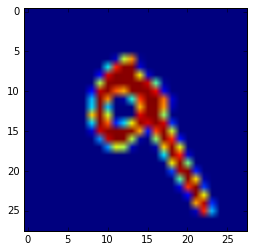

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist.test.images[idxNonPredictable[2]].reshape(-1,28))